# Кластеризация пользователей соцсети с помощью алгоритмов K-Means и EM

Большинство подростков активно общаются в социальных сетях. Многие из них также совершают покупки в интернете, что, естественно, вызывает интерес у рекламодателей. Маркетологи различных компаний стремятся выделять сегменты подростков с похожими интересами, чтобы давать более персонализированную рекламу и привлекать только тех подростков, которые могут стать их потенциальными клиентами. Например, магазину спортивной одежды интересно давать рекламу для девушек и юношей, которые относятся к сегменту интересующихся спортом.

### Цель работы: 

Решить задачу сегментации подростков по их интересам. 

### Данные:

Набор данных представляет собой случайную выборку из 30 000 американских старшеклассников, у которых в 2006 году были профили в одной известной социальной сети, название которой авторы датасета не раскрывают в целях сохранения анонимности. Данные были отобраны равномерно для четырёх разных возрастов (предполагаемый год окончания школы — 2006–2009).

Признаки в данных

- gradyear — год выпуска;
- gender — пол;
- age — возраст;
- friends — число друзей в социальной сети;
- basketball, football, soccer, softball, volleyball, swimming, cheerleading, baseball, tennis, sports, cute, sex, sexy, hot, kissed, dance, band, marching, music, rock, god, church, jesus, bible, hair, dress, blonde, mall, shopping, clothes, hollister, abercrombie, die, death, drunk, drugs (переменные с пятой по сороковую) — частота встречаемости соответствующих слов в сообщениях подростка.

In [23]:
# Импорт нужных библиотек

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import seaborn as sns

In [2]:
# Посмотрим на данные
data = pd.read_csv('snsdata.csv')
data.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        27276 non-null  object 
 2   age           24914 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

## Шаг 1 - удаление неинформативных признаков

Реализуем алгоритм только на признаках, которые заключают в себе ключевые слова, встречающиеся в сообщениях подростков. Удаляем  все остальные признаки. 

In [4]:
data = data.drop(['gradyear','gender','age','friends'], axis=1)
data.shape

(30000, 36)

## Шаг 2 - стандартизация данных

Выполним стандартизацию данных с помощью StandardScaler(). 

In [6]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(data)

# Посмотрим на полученные значения
print(X_norm)


[[-0.33221726 -0.35769737 -0.2428741  ... -0.26153016 -0.22040264
  -0.1749076 ]
 [-0.33221726  1.06004883 -0.2428741  ... -0.26153016 -0.22040264
  -0.1749076 ]
 [-0.33221726  1.06004883 -0.2428741  ...  2.02790809 -0.22040264
  -0.1749076 ]
 ...
 [-0.33221726  1.06004883 -0.2428741  ... -0.26153016 -0.22040264
  -0.1749076 ]
 [-0.33221726 -0.35769737 -0.2428741  ... -0.26153016 -0.22040264
  -0.1749076 ]
 [ 2.15319868 -0.35769737 -0.2428741  ... -0.26153016 -0.22040264
  -0.1749076 ]]


## Шаг 3 - реализация алгоритма K-Means

Реализуем алгоритм k-means c девятью кластерами. В качестве значения параметра random_state возьмём число 42. 

Посчитаем значение инерции (model.inertia_). 

In [7]:
km = KMeans(n_clusters=9, random_state=42)
km.fit(X_norm)
km.inertia_

857169.1033997731

## Шаг 3.1 - оценка числа подростков в получившихся кластерах

Сколько подростков относится к наиболее многочисленному кластеру?

А сколько — к самому малочисленному?

In [8]:
#Список лейблов - номеров кластеров для каждого наблюдения
km.labels_

array([0, 3, 0, ..., 0, 0, 0])

In [9]:
#Сначала создадим столбец с лейблами кластеров 
data.loc[:, 'label'] = km.labels_

#Затем посчитаем, сколько наблюдений относится к каждому кластеру
data.label.value_counts()

#Наиболее многочисленный кластер - 0. Самый малочисленный - 2.

0    19659
3     4490
7     2098
1      930
4      851
6      762
8      716
5      493
2        1
Name: label, dtype: int64

## Шаг 3.2 - оптимизация числа кластеров методом перебора

Мы выделили девять кластеров, но, возможно, это далеко не оптимальное количество. Попробуем применить разные методы для нахождения числа кластеров. Будем выбирать количество кластеров из диапазона от 3 до 9.

Для оценки оптимального числа кластеов применим метод локтя. Каким в этом случае будет оптимальное число кластеров? 

In [10]:
#Создадим данные для оценки оптимального числа кластеров по методу локтя
n_clusters, inertia = [], []
for i in range(3,10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_norm)
    n_clusters.append(i)
    inertia.append(kmeans.inertia_)

#Список числа кластеров    
print(n_clusters)

#Список значений инерции
print(inertia)

[3, 4, 5, 6, 7, 8, 9]
[994116.3386407965, 965032.1004210324, 939457.1761824465, 913395.6572929571, 892309.5548621642, 872318.1671214447, 857169.1033997731]


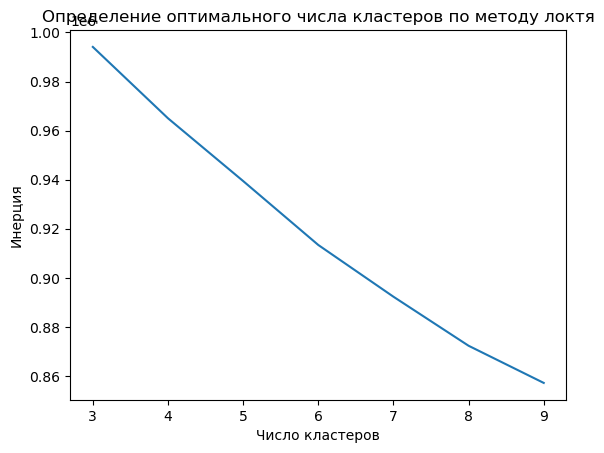

In [11]:
#Строим график для определения оптимального числа кластеров по методу локтя
#Оптимальным числом кластеров, согласно методу локтя, будет то, на котором график имеет значительный излом - здесь заметно меняется темп снижения инерции.

plt.plot(n_clusters, inertia);
plt.xlabel('Число кластеров')
plt.ylabel('Инерция')
plt.title('Определение оптимального числа кластеров по методу локтя');

Определить оптимальное количество кластеров по методу локтя в данном случае затруднительно. Нет явного "перелома" на графике, показывающего, что темп снижения инерции меняется значительно при изменении числа кластеров.

In [12]:
#Создадим данные для оценки оптимального числа кластеров с помощью коэффициента силуэта
n_clusters, silhouette = [], []
for i in range(3,10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_norm)
    n_clusters.append(i)
    silhouette.append(silhouette_score(X_norm, kmeans.labels_))
    
print(n_clusters)
print(silhouette)

[3, 4, 5, 6, 7, 8, 9]
[0.3252983167661199, 0.32524147109392326, 0.3104227626278873, 0.3042253962461188, 0.29152119238612373, 0.25213836279655444, 0.24985471990292196]


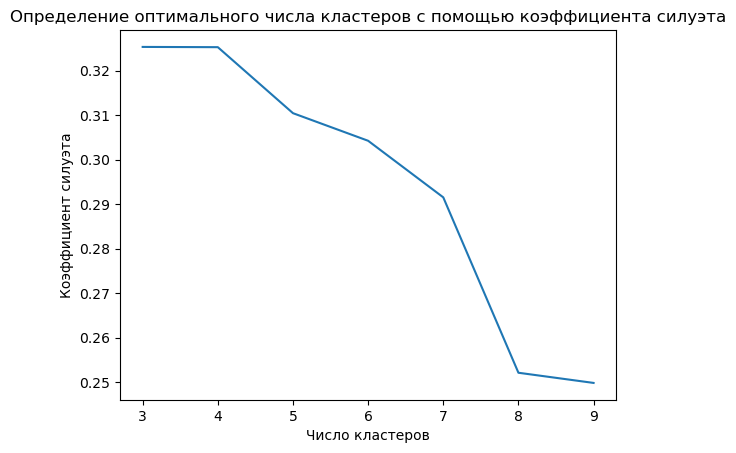

In [13]:
#Строим график для определения оптимального числа кластеров с помощью коэффициента силуэта.
#Чем выше коэффициент силуэта, тем лучше. Выбираем число кластеров, котором соответствует максимальный коэф. силуэта.
plt.plot(n_clusters, silhouette);
plt.xlabel('Число кластеров');
plt.ylabel('Коэффициент силуэта');
plt.title('Определение оптимального числа кластеров с помощью коэффициента силуэта');

Коэффициент силуэта показывает, что оптимальным числом кластеров является 3 или 4. При таком количестве кластеров коэффициент силуэта максимален.

## Шаг 3.3 - реализация K-Means с оптимальным числом кластеров

Опираясь на коэффициент силуэта, реализуем сегментацию подростков на выбранном количестве кластеров.

Выделим ключевые слова, наиболее характерные для каждого из трёх выделенных кластеров.
Оценим среднюю частоту употребления данного слова в кластере. Чем выше частота, тем более характерно слово для кластера. В данной задаче интересуемся словами, которые чаще других используются во всех кластерах.

In [14]:
#Разбиваем данные на три кластера (согласно коэффициенту силуэта)
km = KMeans(n_clusters=3, random_state=42)
km.fit(X_norm)


KMeans(n_clusters=3, random_state=42)

In [15]:
#Создаём столбец с метками кластеров
data.loc[:,'label'] = km.labels_


In [16]:
#Группируем данные по кластерам и находим среднее число употреблений каждого слова в пределах его кластера.
for label, group in data.groupby('label'):
    means = group.iloc[:,:-1].mean().sort_values(ascending=False)
    print('Кластер:', label, '\n', means.head(5), '\n')

Кластер: 0 
 music       1.055406
dance       0.998484
shopping    0.939205
god         0.886325
cute        0.798417
dtype: float64 

Кластер: 1 
 hair      3.223894
sex       2.430088
music     2.262832
kissed    1.575221
die       1.211504
dtype: float64 

Кластер: 2 
 music    0.580455
god      0.330019
dance    0.250785
band     0.243328
hair     0.203122
dtype: float64 



## Шаг 4 - реализация EM-алгоритма

Реализуем EM-алгоритм (GaussianMixture) для 3 кластеров.

Сколько подростков алгоритм отнёс к самому многочисленному кластеру?

In [17]:
gm = GaussianMixture(n_components=3, random_state=42)
predictions = gm.fit_predict(X_norm)
np.unique(predictions, return_counts=True)


(array([0, 1, 2], dtype=int64), array([23426,  6573,     1], dtype=int64))

В самом многочисленном кластере 23426 подростков.

## Шаг 4.1 - изучение самого малочисленного кластера

В одном из кластеров оказался всего один человек. Узнаем, что это за подросток и чем он(а) интересуется.

Найдём три слова, которые чаще всего встречаются в сообщениях этого подростка.

In [18]:
#Из предыдущего шага выяснено, что в кластере 2 всего 1 человек. Посмотрим на связанные с ним данные.
n = np.where(predictions == 2)
user = data.iloc[n]
user

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,label
14187,0,2,0,0,0,1,0,0,0,0,...,0,0,1,0,0,6,6,6,0,1


In [20]:
#Оценка числа употребления слов для выбранного подростка
for i in list(user.columns):
    if user[i].iloc[0] > 10:
        print(i, '-', user[i].iloc[0])
    

sex - 22
hair - 12
blonde - 327
